# Lab02: Gradient Descent.

- Student ID: 20127265
- Student name: Nguyễn Thiện Nhân

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`) Copy file notebook to this folder, compress and submit it on moodle.

**Contents:**
- Gradient descent.

## 1. Loss landscape
![Loss lanscape](img.png) <center>**Figure 1. Loss landscape visualized as a 2D plot. Source: codecamp.vn**<center>

&nbsp;&nbsp;&nbsp;&nbsp; The gradient descent method is an iterative optimization algorithm that operates over a loss landscape (also called an optimization surface).As we can see, our loss landscape has many peaks and valleys based on which values our parameters take on. Each peak is a local maximum that represents very high regions of loss – the local maximum with the largest loss across the entire loss landscape is the global maximum. Similarly, we also have local minimum which represents many small regions of loss. The local minimum with the smallest loss across the loss landscape is our global minimum. In an ideal world, we would like to find this global minimum, ensuring our parameters take on the most optimal possible values.
 
&nbsp;&nbsp;&nbsp;&nbsp;Each position along the surface of the corresponds to a particular loss value given a set of
parameters $\mathbf{W}$ (weight matrix) and $\mathbf{b}$ (bias vector). Our goal is to try different values of $\mathbf{W}$ and $\mathbf{b}$, evaluate their loss, and then take a step towards more optimal values that (ideally) have lower loss.

## 2. The “Gradient” in Gradient Descent

&nbsp;&nbsp;&nbsp;&nbsp;We can use $\mathbf{W}$ and $\mathbf{b}$ and to compute a loss function $L$ or we are able to find our relative position on the loss landscape, but **which direction** we should take a step to move closer to the minimum.

- All We need to do is follow the slope of the gradient $\nabla_{\mathbf{W}}$. We can compute the gradient $\nabla_{\mathbf{W}}$ across all dimensions using the following equation:
$$\dfrac{df\left(x\right)}{dx}=\lim_{h\to0} \dfrac{f\left(x+h\right)-f\left(x\right)}{h}$$
- But, this equation has 2 problems:
    + 1. It’s an *approximation* to the gradient.
    + 2. It’s painfully slow.
    
&nbsp;&nbsp;&nbsp;&nbsp; In practice, we use the **analytic gradient** instead.

## 3. Forward & Backward

In this section, you will be asked to fill in the black to form the forward process and backward process with the data defined as follows:

- Feature: $X$ (shape: $n\times d$, be already used bias trick)
- Label: $y$ (shape: $n\times 1$)
- Weight: $W$ (shape: $d\times 1$)

### 3.1. Forward

**TODO**: Fill in the blank

$$
h = XW \Rightarrow \frac{\partial h}{\partial W} = X
$$

$$
\hat{y} = \sigma(h) \Rightarrow \frac{\partial \hat{y}}{\partial h} = \sigma(X)(1-\sigma(X))
$$

$$
Loss = \frac{1}{2}(\hat{y} - y)^2 \Rightarrow \frac{\partial Loss}{\partial \hat{y}} = \hat{y} - y
$$

### 3.2. Backward

**Goal**: Compute $\nabla Loss = \frac{\partial Loss(W)}{\partial W}$

**How to compute $\nabla Loss$?**: Use Chain-rule. Your work is to fill in the blank

**TODO**: Fill in the blank
$$
\nabla Loss = \frac{\partial Loss(W)}{\partial W} = \frac{\partial Loss}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial h} \cdot \frac{\partial h}{\partial W} = X \cdot \sigma(X) \cdot (1-\sigma(X)) \cdot (\hat{y} - y)
$$

## 4. Implementation

### 4.1. Import library

In [57]:
using MLJ, DataFrames, VegaLite, Distributions
using LinearAlgebra
# import your libraries if needed

### 4.2. Create data

In [6]:
# generate a 2-class classification problem with 1,000 data points, each data point is a 2D feature vector
X, y = make_blobs(1000, 2, centers=2, cluster_std=0.5, rng=1)
df = DataFrame(X)
df.y = convert(Vector{Float64}, y) .- 1

# insert a column of 1’s as the last entry in the feature matrix  
# -- allows us to treat the bias as a trainable parameter
df.x3 = ones(size(df)[1],)
println(first(df, 5))

# Split data, use 50% of the data for training and the remaining 50% for testing
df_train, df_test = partition(df, 0.5)
println(size(df_train), size(df_test))
X_train, y_train = [df_train.x1 df_train.x2 df_train.x3], df_train.y
X_test, y_test = [df_test.x1 df_test.x2 df_test.x3], df_test.y;

5×4 DataFrame
 Row │ x1        x2         y        x3      
     │ Float64   Float64    Float64  Float64 
─────┼───────────────────────────────────────
   1 │ -5.26015   -3.40971      0.0      1.0
   2 │ -4.79323   -4.21907      0.0      1.0
   3 │ -5.30122   -2.28391      0.0      1.0
   4 │ -3.32932  -10.9598       1.0      1.0
   5 │ -2.60354   -9.87621      1.0      1.0
(500, 4)(500, 4)


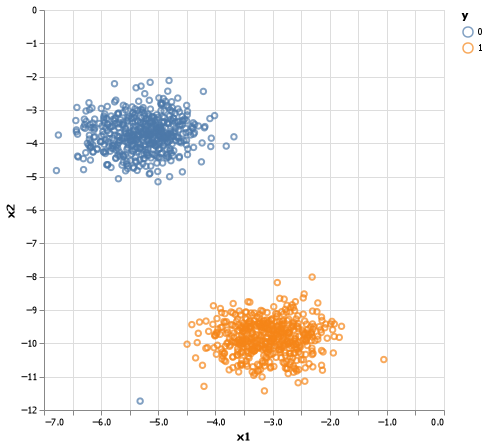

In [7]:
df |> @vlplot(
    :point, 
    x=:x1, y=:x2, 
    color = :"y:n",
    width=400,height=400
)

### 4.3. Training
#### Sigmoid function and derivative of the sigmoid function

In [20]:
function sigmoid_activation(x)
    #TODO
    """compute the sigmoid activation value for a given input"""
    #return?
    return 1 / (1 + exp(-x))
end

function sigmoid_deriv(x)
    #TODO
    """
    Compute the derivative of the sigmoid function ASSUMING
    that the input 'x' has already been passed through the sigmoid
    activation function
    """
    #return?
    return sigmoid_activation(x) * (1 - sigmoid_activation(x))
end

sigmoid_deriv (generic function with 1 method)

#### Compute output

In [72]:
function compute_h(W, X)
    #TODO
    """
    Compute output: Take the inner product between our features 'X' and the weight
    matrix 'W', then pass this value through our sigmoid activation function 
    """
    # return?
    print(X * W)
    # print(h)
    return res
end

function predict(W, X)
    #TODO
    """
    Take the inner product between our features and weight matrix, 
    then pass this value through our sigmoid activation
    """
    preds = computer_h(W, X)

    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds .<= 0.5] .= 0
    preds[preds .> 0] .= 1

    return preds
end

predict (generic function with 1 method)

#### Compute gradient

In [15]:
function compute_gradient(error, y_hat, trainX)
    #TODO 
    """
    the gradient descent update is the dot product between our
    features and the error of the sigmoid derivative of
    our predictions
    """
    # return?
    return trainX * sigmoid_deriv(trainX) * error
end

compute_gradient (generic function with 1 method)

#### Training function 

In [50]:
function train(W, trainX, trainY, learning_rate, num_epochs)
    losses = []
    for epoch in 1:num_epochs
        y_hat = sigmoid_activation(compute_h(W, trainX))
        # now that we have our predictions, we need to determine the
        # 'error', which is the difference between our predictions and
        # the true values
        error = y_hat - trainY
        append!(losses, 0.5 * sum(error .^ 2))
        grad = compute_gradient(error, y_hat, trainX)
        W -= learning_rate * grad

        if epoch == 1 || epoch % 5 == 0
            println("Epoch=$epoch; Loss=$(losses[end])")
        end
    end
    return W, losses
end

train (generic function with 1 method)

#### Initialize our weight matrix and Train our model

In [73]:
W = rand(Normal(), (size(X_train)[2], 1))

num_epochs=100
learning_rate=0.1
W, losses = train(W, X_train, y_train, learning_rate, num_epochs)
plot(1:num_epochs, losses, legend=false)

[-10.904829488662324; -10.302443391940582; -10.771787013480276; -9.155218733051568; -7.805810659926066; -9.913626036956801; -9.181156815815303; -11.103442351072797; -9.165680362712289; -12.776399385456488; -10.61407553647186; -9.856934043262653; -11.003698825214343; -9.219013398702671; -10.496244936168107; -10.072028341607153; -11.721641347605846; -12.314691522055853; -10.84546868954256; -8.142294247327444; -11.193573680792097; -9.930458217219773; -8.806176859414357; -11.658584588332515; -8.871845712331398; -9.268680219736646; -7.982702976514709; -8.876928654265232; -7.803674965379599; -9.893147159467894; -10.800991984420598; -10.805540228380805; -12.504421038160572; -10.079691681921235; -11.168975479494359; -10.654832115470093; -8.467098139665895; -8.265899643301067; -9.002150256000347; -11.46721481322592; -12.041554956205852; -8.563181353826181; -9.728828530806028; -11.863413864427326; -8.170245322950512; -7.441481516927541; -9.712329766757115; -11.631988879534449; -8.498725900912191

; -9.20290659211685; -10.777982828569092; -8.170677958829494; -7.706584892436199; -8.475099805881507; -11.12333148896384; -10.68780354643626; -11.368451364410053; -10.897362865768827; -8.656778984653098; -12.546739079446079; -6.959163645584813; -10.57736034630534; -8.994596451217435; -7.042656594764967; -12.800269965543196; -9.647333739304004; -9.788228225604742; -12.66919972213911; -12.04780670168543; -12.517153357943718; -11.975493233038186; -8.642319082092419; -7.242045496817198; -11.463386510446306; -8.036766916935937; -12.476476255591985; -11.732321383516998; -8.926460117542454; -11.325861967423721; -10.97918403960062; -7.385245433571845; -9.911214892795277; -10.117284701068606; -8.224758575600925; -8.734469640374668; -10.82713368991819; -10.873022788053266; -9.059986959055507; -9.951515894060217; -8.568705404676573; -8.460358197507151; -10.472220951828469; -10.181130904385196; -8.488770702441062; -7.931432725488943; -11.751265837249429; -7.799137172105547; -10.065543571821035; -7

UndefVarError: UndefVarError: res not defined

#### Evaluate result

In [9]:
preds = predict(W, X_test)
acc = accuracy(preds, reshape(y_test, length(y_test), 1))
p = precision(preds, reshape(y_test, length(y_test), 1))
r = recall(preds, reshape(y_test, length(y_test), 1))
f1 = 2*p*r/(p + r)
print("acc: $acc, precision: $p, recall: $r, f1_score: $f1\n")

UndefVarError: UndefVarError: W not defined

In [10]:
# visualize the result of predictions
df_test.y_hat = reshape(preds, (length(preds),))
df_test |> @vlplot(
    :point, 
    x=:x1, y=:x2, 
    color = :"y_hat:n",
    width=400,height=400
)

UndefVarError: UndefVarError: preds not defined

**TODO: Study about accuracy, recall, precision, f1-score.**
- Accuracy:
- Recall:
- Precision:
- F1:

**TODO: Try out different learning rates. Give me your observations**